# How To Export a Model Trained in Supervisely

After you have trained a model using Supervisely application, you can download its weights and config file, and use the model outside Supervisely Platform.

## Clone repository

`git clone https://github.com/supervisely-ecosystem/mmclassification`

**Note:** This repo contains source code for **mmcls** framework, that was deprecated and renamed to [mmpretrain](https://github.com/open-mmlab/mmpretrain). If you clone our repo, you don't need to install mmcls or mmpretrain packages.

## 1. Download model weights and config from Team Files

**1. Go to Team Files:**

![Team Files](https://github.com/supervisely-ecosystem/mmsegmentation/assets/31512713/678fbf96-e16c-449d-9e5d-1ae4efc8a796)

**2. Download model weights:**

![Download model](https://github.com/supervisely-ecosystem/mmclassification/assets/31512713/338fd0dd-6460-445b-8a07-f69e1aed9b3c)

**3. Download two config files:**

Paths will look like:

- `/mmclassification/25763_cat_breeds_10/configs/dataset_config.py`
- `/mmclassification/25763_cat_breeds_10/configs/model_config.py`

![Download configs](https://github.com/supervisely-ecosystem/mmclassification/assets/31512713/5ef03522-4e82-4055-9401-19d72a4a83d5)

**Alternatively, you can download these files using Supervisely API:**

In [ ]:
# Install supervisely SDK if not installed
!pip install supervisely

In [ ]:
# Fill in these arguments:
server_address = "https://..."
api_token = "abcd0123456789..."
team_id = ...
path_to_weights_in_team_files = ...
path_to_model_config_in_team_files = ...
path_to_dataset_config_in_team_files = ...
download_dir = "./my_model"

import supervisely as sly
api = sly.Api(server_address, api_token)
api.file.download(team_id, path_to_weights_in_team_files, f"{download_dir}/weights.pth")
api.file.download(team_id, path_to_model_config_in_team_files, f"{download_dir}/model_config.py")
api.file.download(team_id, path_to_dataset_config_in_team_files, f"{download_dir}/dataset_config.py")

## 2. Install requirements

**You can use our pre-builded docker image:**

`supervisely/mmcls:1.0.1`

Or build the image with this [Dockerfile](https://github.com/supervisely-ecosystem/mmclassification/blob/master/supervisely/docker/Dockerfile).

**Alternatively, you can install only needed requirements with pip:**

In [ ]:
!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 --extra-index-url https://download.pytorch.org/whl/cu113
!pip install mmcv==1.3.5

## 3. Build the model

After you've installed requirements and downloaded model weights and config, **fill in the paths** where the files located:

In [29]:
# Put your paths here:
weights_path = "my_model/weights.pth"
config_path = "my_model/model_config.py"
dataset_config_path = "my_model/dataset_config.py"

device = "cuda:0"

In [30]:
from mmcv import Config
from mmcls.apis import init_model

cfg = Config.fromfile(config_path)
data_cfg = Config.fromfile(dataset_config_path)
cfg.merge_from_dict(data_cfg)
model = init_model(cfg, weights_path, device=device)

Use load_from_local loader


## 4. Inference

In [32]:
from mmcls.apis import inference_model

image_path = "demo/demo_cat.jpg"
result = inference_model(model, image_path)
result

{'pred_label': 1,
 'pred_score': 0.8491525053977966,
 'pred_class': 'scottish fold'}

## 5. Visualize

/root/mmclassification/mmcls/models/classifiers/base.py:227: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


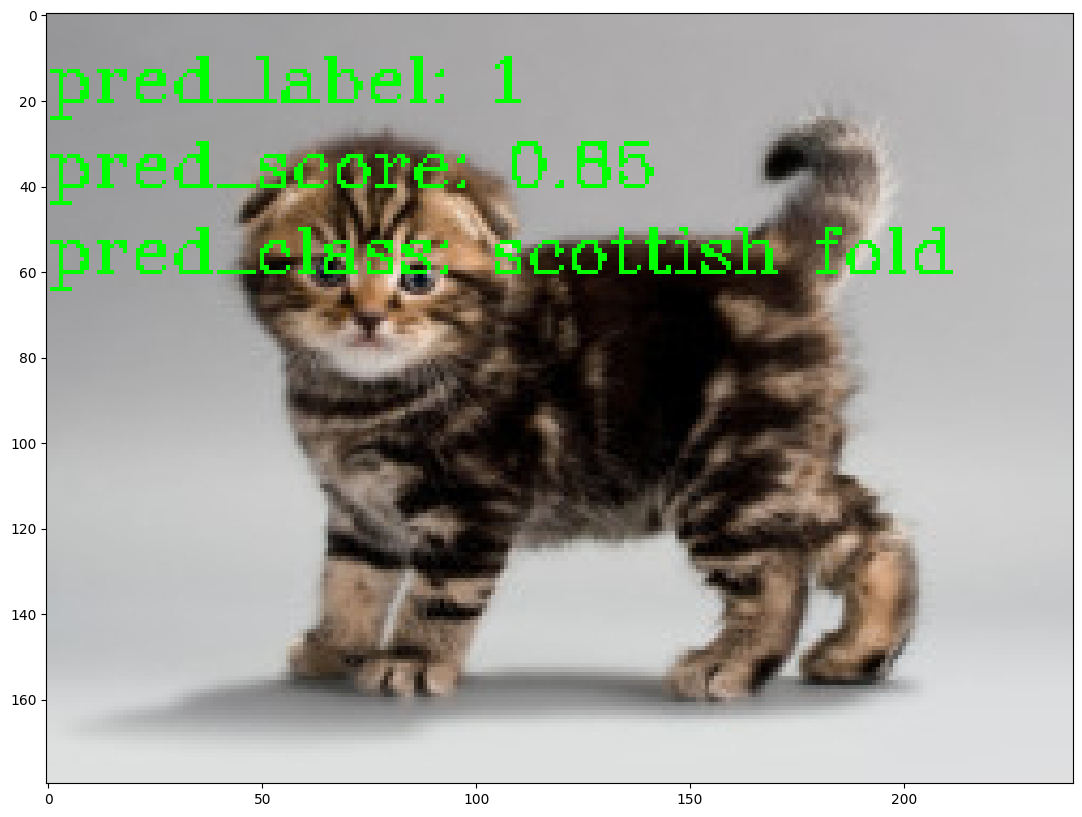

In [21]:
from mmcls.apis.inference import show_result_pyplot

show_result_pyplot(model, image_path, result)